# Importing data and packages

In [4]:
cd Documents/Uni/Internship/Data

/Users/liamg/Documents/Uni/Internship/Data


In [5]:
ls

Altered_processing_script.R            filtered_compiled_data_useful.csv
MICE.R                                 filtered_compiled_data_useful.xlsx
ProcessingDataEnvironment.RData        filtered_compiled_data_useful_2.xlsx
QZImportFinal2-Anoniem (1).xlsx        imputed_data.csv
QZImportFinal2-Anoniem.xlsx            imputed_data_V1.csv
QZImportFinal2-Anoniem_annotated.xlsx  imputed_data_V2.csv
Rplot.png                              updated_compiled_data.csv
compiled_data.csv                      updated_compiled_data.xls
data_compiled.Rdata                    updated_compiled_data.xlsx
data_compiled.Rds                      updated_compiled_data_V1.csv
filtered_compiled_data.csv             updated_data_compiled.Rdata
filtered_compiled_data_python.xlsx     updated_data_compiled.Rds
filtered_compiled_data_python2.xlsx    ~$updated_compiled_data.xlsx


In [6]:
# General Packages that we'll use to handle and plot any data for now
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("updated_compiled_data.csv")
data.head()

,gender.male_1,age,n_current_diseases,eGFR,in_all_12m_MUMC.yes_1,n_ER_12m_MUMC,patient_reported_medicine_use.yes_1,pill_box.yes_1,person_responsible_for_medicines,education,...,specialty_MUMC_external_hospital.pediatrics_1,specialty_MUMC_external_hospital.anesthesiology_1,specialty_MUMC_external_hospital.other_1,n_specialty_MUMC_external_hospital,n_specialty_MUMC_external_hospital.centered,n_specialty_MUMC_external_hospital.std,revision_physician.medicine_1,revision_physician.non_medicine_1,revision_physician.none_1,y
0,0,56,0,60-89 ml/min,0,0,1,0,patient,type 3,...,0,0,1,3,-0.147712,-0.076679,0,0,1,0
1,0,52,1,> 90 ml/min,0,0,1,0,patient,type 3,...,0,0,0,2,-1.147712,-0.595786,0,0,1,0
2,0,62,3,NaN,0,0,1,0,patient,type 4,...,0,0,1,3,-0.147712,-0.076679,0,0,1,0
3,0,70,2,60-89 ml/min,0,0,1,1,patient,type 4,...,0,0,0,3,-0.147712,-0.076679,0,0,1,0
4,0,68,3,15-29 ml/min,1,2,1,1,patient,type 2,...,0,0,1,7,3.852288,1.999751,0,0,1,0


In [8]:
print(sum(data["y"] == 1)) # number of positive class outcomes

print(sum(data["y"] == 0)) # number of negative class outcomes

89
2206


# Counting NAs

In [9]:
NAs_present = []
NAs_present_colnames = []
NAs_error_amount = []

for i in range(len(data.columns)):
    if data.iloc[:,i].isnull().values.sum() > 0:
        print("Column number {}, or {} has {} missing values".format(i, data.iloc[:,i].name, data.iloc[:,i].isnull().values.sum()))
        NAs_present.append(i)
        NAs_present_colnames.append(data.iloc[:,i].name)
        NAs_error_amount.append(data.iloc[:,i].isnull().values.sum())

Column number 3, or eGFR has 712 missing values
Column number 8, or person_responsible_for_medicines has 250 missing values
Column number 9, or education has 118 missing values
Column number 10, or allergy_medicine.yes_1 has 3 missing values
Column number 11, or inoutER_12m_external_hospital.yes_1 has 38 missing values
Column number 12, or in_all_12m_external_hospital.yes_1 has 2 missing values
Column number 14, or medicines_literacy has 7 missing values


In [10]:
data_NAs = []
data_NAs = [NAs_present, NAs_present_colnames, NAs_error_amount]

df_NAs = pd.DataFrame(data_NAs).T
df_NAs.columns = ["Column Index", "Feature", "No. of NAs"]
print(df_NAs)

  Column Index                              Feature No. of NAs
0            3                                 eGFR        712
1            8     person_responsible_for_medicines        250
2            9                            education        118
3           10               allergy_medicine.yes_1          3
4           11  inoutER_12m_external_hospital.yes_1         38
5           12   in_all_12m_external_hospital.yes_1          2
6           14                   medicines_literacy          7


In [11]:
prop_NAs = data.iloc[:,:].isnull().values.sum() / 394740 # total number of NAs divided by the total number of data points in our table
prop_NAs
print("{}% of our values are missing values".format(float(f'{data.iloc[:,:].isnull().values.sum() / 394740*100:.2f}')))

0.29% of our values are missing values


The R package mice will be used for the imputation, so we'll come back to this script after we have the imputations completed. 

Be back soon...

Loading the newly imputed data

In [12]:
data = pd.read_csv("imputed_data_V2.csv")

In [13]:
print("Summaries of the data that been imputed")
print(data.shape)
print(data.isnull().values.sum(), "missing values")
data.head()

Summaries of the data that been imputed
(2295, 194)
0 missing values


,gender.male_1,age,n_current_diseases,eGFR,in_all_12m_MUMC.yes_1,n_ER_12m_MUMC,patient_reported_medicine_use.yes_1,pill_box.yes_1,person_responsible_for_medicines,education,...,eGFR.15_29_1,eGFR.below_15_1,eGFR.NA_1,eGFR.above_60_1,eGFR.below_60_1,eGFR.below_30_1,revision_physician.medicine_1,revision_physician.non_medicine_1,revision_physician.none_1,y
0,0,56,0,60-89 ml/min,0,0,1,0,patient,type 3,...,0,0,0,1,0,0,0,0,1,0
1,0,52,1,> 90 ml/min,0,0,1,0,patient,type 3,...,0,0,0,1,0,0,0,0,1,0
2,0,62,3,> 90 ml/min,0,0,1,0,patient,type 4,...,0,0,0,1,0,0,0,0,1,0
3,0,70,2,60-89 ml/min,0,0,1,1,patient,type 4,...,0,0,0,1,0,0,0,0,1,0
4,0,68,3,15-29 ml/min,1,2,1,1,patient,type 2,...,1,0,0,0,1,1,0,0,1,0


In [14]:
for col in data.columns:
    i_type = type(data.iloc[0][col])
    if i_type == str:
        print("string entries need to be factorised for", col)

string entries need to be factorised for eGFR
string entries need to be factorised for person_responsible_for_medicines
string entries need to be factorised for education
string entries need to be factorised for medicines_literacy
string entries need to be factorised for out_specialty_current_MUMC


In [16]:
shape = data.shape        ## converting any character variables to factors 
for i in range(shape[1]):
    print(type(data.iloc[1,i]))
    if type(data.iloc[1,i]) == str:
        print("factorising..")
        codes, unique = pd.factorize(data.iloc[:,i])
        print(np.unique(codes), unique)
        data.iloc[:,i] = codes

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
factorising..
[0 1 2 3 4] Index(['60-89 ml/min', '> 90 ml/min', '15-29 ml/min', '30-59 ml/min',
       '< 15 ml/min'],
      dtype='object')
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
factorising..
[0 1 2] Index(['patient', 'health professional', 'partner or caregiver'], dtype='object')
<class 'str'>
factorising..
[0 1 2 3] Index(['type 3', 'type 4', 'type 2', 'type 1'], dtype='object')
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
factorising..
[0 1 2] Index(['adequate', 'suboptimal', 'insufficient'], dtype='object')
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy

In [18]:
data.head()

,gender.male_1,age,n_current_diseases,eGFR,in_all_12m_MUMC.yes_1,n_ER_12m_MUMC,patient_reported_medicine_use.yes_1,pill_box.yes_1,person_responsible_for_medicines,education,...,eGFR.15_29_1,eGFR.below_15_1,eGFR.NA_1,eGFR.above_60_1,eGFR.below_60_1,eGFR.below_30_1,revision_physician.medicine_1,revision_physician.non_medicine_1,revision_physician.none_1,y
0,0,56,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,52,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,62,3,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,70,2,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,68,3,2,1,2,1,1,0,2,...,1,0,0,0,1,1,0,0,1,0


# Checking for high correlations between features

Just because we haven't done it yet, we can check for any correlations that may mess with our dataset. 
For example, we have the original as well as centered means of continuous variables, so they will be highly correlated (at 1), as well as the standard deviation calculations for those same variables. 

In [19]:
cor_matrix = data.corr()

In [20]:
print(cor_matrix['age'].sort_values(ascending=False))
age_corr = abs(cor_matrix['age']) > 0.5 
print(age_corr==True)

age.std                                                     1.000000
age.centered                                                1.000000
age                                                         1.000000
n_current_diseases.centered                                 0.412136
n_current_diseases                                          0.412136
                                                              ...   
eGFR.above_90_1                                            -0.608224
current_diseases.none_of_the_above_1                             NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1         NaN
inout_specialty_12m_external_hospital.do_not_select_1            NaN
eGFR.NA_1                                                        NaN
Name: age, Length: 194, dtype: float64
gender.male_1                        False
age                                   True
n_current_diseases                   False
eGFR                                 False
in_all_12m_MUMC.yes_1         

In [21]:
print(cor_matrix['y'].sort_values(ascending=False))
y_corr = abs(cor_matrix['y']) > 0.5
print(y_corr)

y                                                                                 1.000000
person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1    1.000000
person_responsible_for_medicines.patient_1                                        0.856692
revision_physician.medicine_1                                                     0.856692
revision_physician.non_medicine_1                                                 0.500919
                                                                                    ...   
person_responsible_for_medicines.health_professional_1                           -1.000000
current_diseases.none_of_the_above_1                                                   NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1                               NaN
inout_specialty_12m_external_hospital.do_not_select_1                                  NaN
eGFR.NA_1                                                                              NaN

In [22]:
print(cor_matrix['n_current_diseases'].sort_values(ascending=False))

n_current_diseases.centered                                 1.000000
n_current_diseases                                          1.000000
n_current_diseases.std                                      1.000000
current_diseases.cardiovascular_disease_1                   0.677663
n_prescribed_medicines.centered                             0.602649
                                                              ...   
eGFR.above_90_1                                            -0.307882
current_diseases.none_of_the_above_1                             NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1         NaN
inout_specialty_12m_external_hospital.do_not_select_1            NaN
eGFR.NA_1                                                        NaN
Name: n_current_diseases, Length: 194, dtype: float64


In [23]:
print(cor_matrix['person_responsible_for_medicines.patient_1'].sort_values(ascending=False))

revision_physician.medicine_1                                                     1.000000
person_responsible_for_medicines.patient_1                                        1.000000
person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1    0.856692
y                                                                                 0.856692
out_specialty_current_MUMC.surgery_1                                              0.107977
                                                                                    ...   
revision_physician.none_1                                                        -0.856692
current_diseases.none_of_the_above_1                                                   NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1                               NaN
inout_specialty_12m_external_hospital.do_not_select_1                                  NaN
eGFR.NA_1                                                                              NaN

In [24]:
print(cor_matrix['education.type_1_1'].sort_values(ascending=False))

education.type_1_1                                          1.000000
education                                                   0.549955
medicines_literacy                                          0.180090
housing.home_care_or_institution_1                          0.176693
medicines_literacy.suboptimal_or_insufficient_1             0.172956
                                                              ...   
education.type_4_1                                         -0.191467
current_diseases.none_of_the_above_1                             NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1         NaN
inout_specialty_12m_external_hospital.do_not_select_1            NaN
eGFR.NA_1                                                        NaN
Name: education.type_1_1, Length: 194, dtype: float64


In [25]:
print(cor_matrix['n_specialty_MUMC_external_hospital'].sort_values(ascending=False))

n_specialty_MUMC_external_hospital.centered                 1.000000
n_specialty_MUMC_external_hospital                          1.000000
n_specialty_MUMC_external_hospital.std                      1.000000
n_specialty_MUMC.std                                        0.930717
n_specialty_MUMC                                            0.930717
                                                              ...   
n_visits_out_all_12m_MUMC.0_1                              -0.332736
current_diseases.none_of_the_above_1                             NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1         NaN
inout_specialty_12m_external_hospital.do_not_select_1            NaN
eGFR.NA_1                                                        NaN
Name: n_specialty_MUMC_external_hospital, Length: 194, dtype: float64


In [26]:
print(cor_matrix['n_ER_12m_external_hospital.centered'].sort_values(ascending=False))

n_ER_12m_external_hospital                                   1.000000
n_ER_12m_external_hospital.centered                          1.000000
n_ER_12m_external_hospital.std                               1.000000
inoutER_12m_external_hospital.yes_1                          0.269962
inout_specialty_12m_external_hospital.internal_medicine_1    0.236230
                                                               ...   
age.std                                                     -0.088764
current_diseases.none_of_the_above_1                              NaN
n_visits_out_current_specialty_12m_36m_MUMC.3_or_above_1          NaN
inout_specialty_12m_external_hospital.do_not_select_1             NaN
eGFR.NA_1                                                         NaN
Name: n_ER_12m_external_hospital.centered, Length: 194, dtype: float64


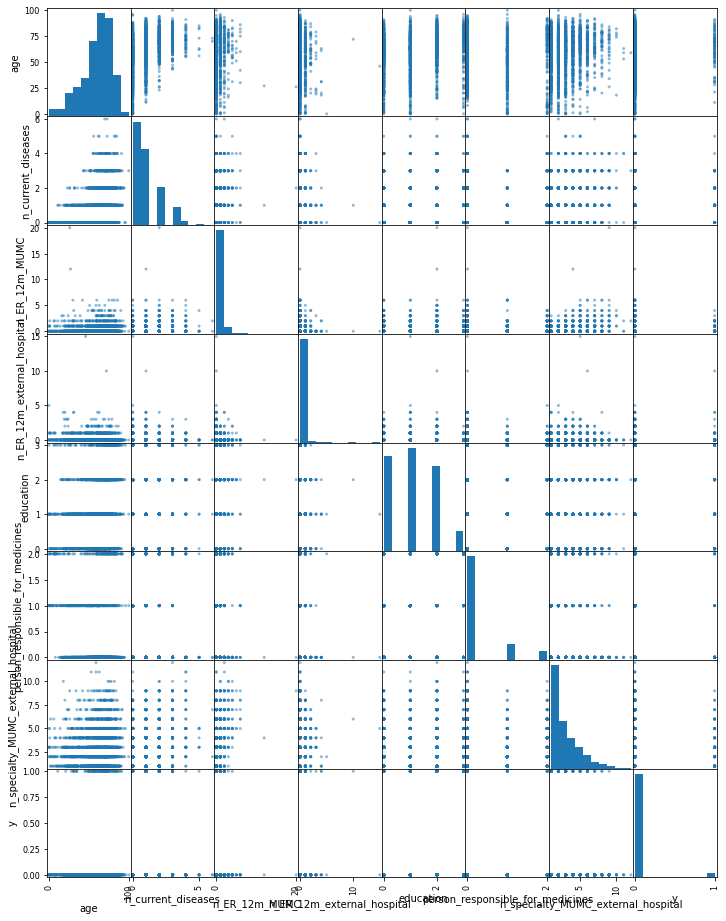

In [29]:
from pandas.plotting import scatter_matrix
att = ["age", "n_current_diseases", 
       "n_ER_12m_MUMC", "n_ER_12m_external_hospital",
       "education", "person_responsible_for_medicines", 
       "n_specialty_MUMC_external_hospital", "y"]
scatter_matrix(data[att], figsize=(12,16))
plt.show()

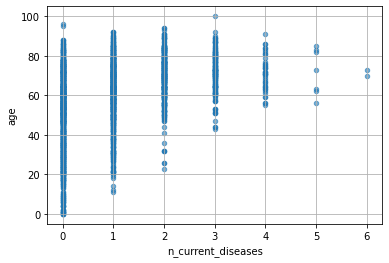

In [31]:
data.plot(kind="scatter", x = "n_current_diseases", y = "age", alpha = 0.6, grid = True)
plt.show()

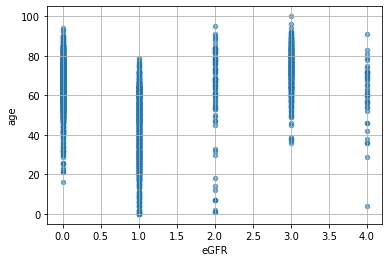

In [32]:
data.plot(kind="scatter", x = "eGFR", y = "age", alpha = 0.6, grid = True)
plt.show()


## getting rid of any high correlations before the recursive feature elimination

In [33]:
correlated_features = set()
correlation_matrix = data.drop(['y', 
                                'revision_physician.medicine_1', 
                                'revision_physician.non_medicine_1', 
                                'revision_physician.none_1'], axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [34]:
correlated_features

{'age.centered',
 'age.std',
 'eGFR.above_60_1',
 'eGFR.below_30_1',
 'eGFR.below_60_1',
 'education.type_3_1',
 'high_risk_medicines.glucose_lowering_medicines_1',
 'housing.home_care_1',
 'housing.home_care_or_institution_1',
 'inout_specialty_12m_MUMC.surgery_composite_1',
 'inout_specialty_12m_external_hospital.surgery_composite_1',
 'medicines_literacy.adequate_1',
 'medicines_literacy.suboptimal_1',
 'medicines_literacy.suboptimal_or_insufficient_1',
 'n_ER_12m_MUMC.centered',
 'n_ER_12m_MUMC.std',
 'n_ER_12m_external_hospital.centered',
 'n_ER_12m_external_hospital.std',
 'n_current_diseases.centered',
 'n_current_diseases.std',
 'n_prescribed_medicines.std',
 'n_specialty_MUMC.centered',
 'n_specialty_MUMC.std',
 'n_specialty_MUMC_external_hospital',
 'n_specialty_MUMC_external_hospital.centered',
 'n_specialty_MUMC_external_hospital.std',
 'person_responsible_for_medicines.health_professional_1',
 'person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1'

We'll remove the the original highly correlated features, for example, we prefer to keep age.centered rather than age by itself. 

In [35]:
correlated_features.remove('age.centered')
correlated_features.remove('n_ER_12m_MUMC.centered')
correlated_features.remove('n_ER_12m_external_hospital.centered')
correlated_features.remove('n_current_diseases.centered')
correlated_features.remove('n_specialty_MUMC.centered')
correlated_features.remove('n_specialty_MUMC_external_hospital.centered')

correlated_features.add('age')
correlated_features.add('n_ER_12m_MUMC')
correlated_features.add('n_ER_12m_external_hospital')
correlated_features.add('n_current_diseases') 
correlated_features.add('n_specialty_MUMC') 



In [36]:
length(correlated_features)
correlated_features

{'age',
 'age.std',
 'eGFR.above_60_1',
 'eGFR.below_30_1',
 'eGFR.below_60_1',
 'education.type_3_1',
 'high_risk_medicines.glucose_lowering_medicines_1',
 'housing.home_care_1',
 'housing.home_care_or_institution_1',
 'inout_specialty_12m_MUMC.surgery_composite_1',
 'inout_specialty_12m_external_hospital.surgery_composite_1',
 'medicines_literacy.adequate_1',
 'medicines_literacy.suboptimal_1',
 'medicines_literacy.suboptimal_or_insufficient_1',
 'n_ER_12m_MUMC',
 'n_ER_12m_MUMC.std',
 'n_ER_12m_external_hospital',
 'n_ER_12m_external_hospital.std',
 'n_current_diseases',
 'n_current_diseases.std',
 'n_prescribed_medicines.std',
 'n_specialty_MUMC',
 'n_specialty_MUMC.std',
 'n_specialty_MUMC_external_hospital',
 'n_specialty_MUMC_external_hospital.std',
 'person_responsible_for_medicines.health_professional_1',
 'person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1',
 'specialty_MUMC.cardiology_1',
 'specialty_MUMC.dermatology_1',
 'specialty_MUMC.orthopedi

Now we can see that none of our nicely centered features are going to be removed. Rather we remove the original measurement. 

In [37]:
uncor_data = data.drop(correlated_features, axis=1)

In [38]:
print(uncor_data.shape)
uncor_data.head()


(2295, 147)


,gender.male_1,eGFR,in_all_12m_MUMC.yes_1,patient_reported_medicine_use.yes_1,pill_box.yes_1,person_responsible_for_medicines,education,allergy_medicine.yes_1,inoutER_12m_external_hospital.yes_1,in_all_12m_external_hospital.yes_1,...,eGFR.above_90_1,eGFR.60_89_1,eGFR.30_59_1,eGFR.15_29_1,eGFR.below_15_1,eGFR.NA_1,revision_physician.medicine_1,revision_physician.non_medicine_1,revision_physician.none_1,y
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,1,1,1,0,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Feature Elimination using RFE

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [85]:
xdata = uncor_data
outcomes = ['y', 'revision_physician.medicine_1', 'revision_physician.non_medicine_1', 'revision_physician.none_1', 'record']

x = xdata.drop(outcomes, axis=1)
target = xdata['y']

rfc = RandomForestClassifier(random_state=11)
rfecv = RFECV(estimator=rfc, step=1, min_features_to_select = 20, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -2)
rfecv.fit(x, target)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=11),
      min_features_to_select=20, n_jobs=-2, scoring='accuracy')

In [96]:
print('Optimal number of features are somewhere around {}'.format(rfecv.n_features_))

Optimal number of features are somewhere around 20


/Users/liamg/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


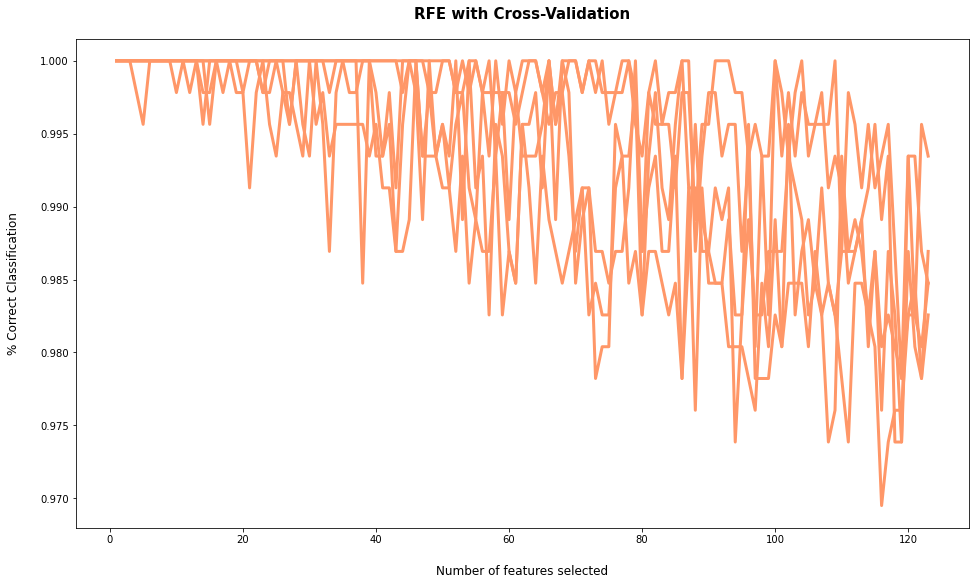

In [87]:
plt.figure(figsize=(16, 9))
plt.title('RFE with Cross-Validation', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=12, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=12, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#ff9768', linewidth=3)

plt.show()

In [97]:
print(rfecv.estimator_.feature_importances_)

print("the most important features according to the RFE run are the following below")
x.iloc[:,rfecv.support_]

[0.00941526 0.01031492 0.00488012 0.00873147 0.0257118  0.00946777
 0.02147408 0.00416769 0.00548442 0.00490118 0.00537719 0.0192756
 0.0066598  0.00475964 0.0087005  0.00737941 0.01356972 0.01173891
 0.61945696 0.19853357]
the most important features according to the RFE run are the following below


,eGFR,education,allergy_medicine.yes_1,medicines_literacy,age.centered,n_current_diseases.centered,n_prescribed_medicines.centered,high_risk_medicines.opioids_1,high_risk_medicines.psychotropics_1,medicines_wo_prescription.multi_vitamins_dietary_supplement_1,medicines_wo_prescription.other_1,out_specialty_current_MUMC,out_specialty_current_MUMC.surgery_1,n_visits_out_all_12m_MUMC.2_to_5_1,n_specialty_MUMC.centered,n_ER_12m_MUMC.centered,n_ER_12m_external_hospital.centered,n_specialty_MUMC_external_hospital.centered,person_responsible_for_medicines.patient_1,person_responsible_for_medicines.partner_or_caregiver_1
0,0,0,1,0,-3.206536,-0.948148,-4.952505,0,0,0,1,0,0,0,0.182135,-0.375599,-0.165142,-0.147712,0,0
1,1,0,0,0,-7.206536,0.051852,5.047495,0,0,0,1,1,0,0,-0.817865,-0.375599,-0.165142,-1.147712,0,0
2,1,1,1,0,2.793464,2.051852,-3.952505,0,0,0,1,2,0,1,0.182135,-0.375599,-0.165142,-0.147712,0,0
3,0,1,1,0,10.793464,1.051852,2.047495,0,0,0,0,3,0,1,-0.817865,-0.375599,-0.165142,-0.147712,0,0
4,2,2,1,1,8.793464,2.051852,12.047495,0,0,1,0,4,0,0,4.182135,1.624401,-0.165142,3.852288,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,0,1,1,0,1.793464,-0.948148,0.047495,0,1,1,0,2,0,0,-0.817865,-0.375599,-0.165142,0.852288,0,0
2291,1,1,0,0,-28.206536,-0.948148,-5.952505,0,0,1,1,15,0,0,-1.817865,-0.375599,-0.165142,-2.147712,0,0
2292,2,1,0,1,-41.206536,-0.948148,0.047495,0,0,0,0,2,0,0,-1.817865,-0.375599,3.834858,0.852288,0,0
2293,3,2,0,1,21.793464,-0.948148,-0.952505,0,0,0,0,15,0,0,-1.817865,-0.375599,-0.165142,-1.147712,0,0


In [98]:
print(np.where(rfecv.support_ == False)[0])

x.drop(x.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[  0   2   3   4   5   8   9  12  13  14  15  16  17  18  19  20  21  24
  25  26  27  28  29  32  33  34  35  36  37  38  41  43  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 132 133 134 135 136 137 138 139 140 141]


The columns above are all ofthe features that were dropped. 

These represent the most informative features selected from the recursive elimination. It is always just settling on the minimum amount of features alloweed, in the last run it was 20. It will go down to using 1 only if we let it. 

I am looking into improving this and getting more reliable results. 
But I want to finish this accurately before I move onto tabddpm and XGboost.